# AutoML 맛보기 

## TPOT으로 하는 모델링

In [1]:
# Import required libraries
from tpot import TPOTClassifier
from sklearn.cross_validation import train_test_split



/usr/local/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
from eval_score import *

 - 데이터셋 : 포르투갈 은행 연합의 TM 마케팅 정보를 나타낸 데이터셋 이다. 
 - Y : 고객이 정기 예금을 신청할 것인가? 

In [3]:
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)

In [4]:
#Load the data
Marketing=pd.read_csv('datasets/Data_FinalProject.csv')
Marketing.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [5]:
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone') 
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). 
    Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric) 
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric) 
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')



SyntaxError: invalid syntax (<ipython-input-5-aaf79ee03b2b>, line 1)

## DATA EXPLORATION

In [6]:
Marketing.columns.values

array(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'], dtype=object)

In [7]:
Marketing.groupby('loan').y.value_counts()

loan     y  
no       no     30100
         yes     3850
unknown  no       883
         yes      107
yes      no      5565
         yes      683
Name: y, dtype: int64

In [8]:
Marketing.groupby(['loan','marital']).y.value_counts()

loan     marital   y  
no       divorced  no      3420
                   yes      396
         married   no     18469
                   yes     2098
         single    no      8155
                   yes     1345
         unknown   no        56
                   yes       11
unknown  divorced  no       113
                   yes        8
         married   no       528
                   yes       60
         single    no       241
                   yes       39
         unknown   no         1
yes      divorced  no       603
                   yes       72
         married   no      3399
                   yes      374
         single    no      1552
                   yes      236
         unknown   no        11
                   yes        1
Name: y, dtype: int64

## DATA WRANGLING

In [9]:
Marketing.rename(columns={'y': 'class'}, inplace=True)

In [10]:
Marketing['class'].unique()

array(['no', 'yes'], dtype=object)

In [11]:
Marketing.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
class              object
dtype: object

In [12]:
# check the number of levels of the categorical variables
for  cat  in  ['job',  'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome' ,'class']:
    print("Number of levels in category '{0}': \b {1:2.2f} ".format(cat, Marketing[cat].unique().size))

Number of levels in category 'job': 12.00 
Number of levels in category 'marital': 4.00 
Number of levels in category 'education': 8.00 
Number of levels in category 'default': 3.00 
Number of levels in category 'housing': 3.00 
Number of levels in category 'loan': 3.00 
Number of levels in category 'contact': 2.00 
Number of levels in category 'month': 10.00 
Number of levels in category 'day_of_week': 5.00 
Number of levels in category 'poutcome': 3.00 
Number of levels in category 'class': 2.00 


categorical 변수들 중 category가 많지 않은 변수들은 numeric 변수로 변환

In [13]:
for cat in ['contact', 'poutcome','class', 'marital', 'default', 'housing', 'loan']:
    print("Levels for catgeory '{0}': {1}".format(cat, Marketing[cat].unique()))

Levels for catgeory 'contact': ['telephone' 'cellular']
Levels for catgeory 'poutcome': ['nonexistent' 'failure' 'success']
Levels for catgeory 'class': ['no' 'yes']
Levels for catgeory 'marital': ['married' 'single' 'divorced' 'unknown']
Levels for catgeory 'default': ['no' 'unknown' 'yes']
Levels for catgeory 'housing': ['no' 'yes' 'unknown']
Levels for catgeory 'loan': ['no' 'yes' 'unknown']


In [14]:
Marketing['marital'] = Marketing['marital'].map({'married':0,'single':1,'divorced':2,'unknown':3})
Marketing['default'] = Marketing['default'].map({'no':0,'yes':1,'unknown':2})
Marketing['housing'] = Marketing['housing'].map({'no':0,'yes':1,'unknown':2})
Marketing['loan'] = Marketing['loan'].map({'no':0,'yes':1,'unknown':2})
Marketing['contact'] = Marketing['contact'].map({'telephone':0,'cellular':1})
Marketing['poutcome'] = Marketing['poutcome'].map({'nonexistent':0,'failure':1,'success':2})
Marketing['class'] = Marketing['class'].map({'no':0,'yes':1})

Numeric 변수 중 nan 을 갖고 있는 row 는 -999로 변환

In [15]:
Marketing = Marketing.fillna(-999)
pd.isnull(Marketing).any()

age               False
job               False
marital           False
education         False
default           False
housing           False
loan              False
contact           False
month             False
day_of_week       False
duration          False
campaign          False
pdays             False
previous          False
poutcome          False
emp.var.rate      False
cons.price.idx    False
cons.conf.idx     False
euribor3m         False
nr.employed       False
class             False
dtype: bool

categorical 변수들 중 category가 많은 변수는 MultiLabelBinarizer 사용

In [16]:
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()

job_Trans = mlb.fit_transform([{str(val)} for val in Marketing['job'].values])
education_Trans = mlb.fit_transform([{str(val)} for val in Marketing['education'].values])
month_Trans = mlb.fit_transform([{str(val)} for val in Marketing['month'].values])
day_of_week_Trans = mlb.fit_transform([{str(val)} for val in Marketing['day_of_week'].values])

In [17]:
day_of_week_Trans

array([[0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       ...,
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0]])

In [18]:
marketing_new = Marketing.drop(['marital','default','housing','loan','contact'
                                ,'poutcome','class','job','education','month'
                                ,'day_of_week'], axis=1)

In [19]:
marketing_new = np.hstack((marketing_new.values, job_Trans, education_Trans, month_Trans, day_of_week_Trans))

In [20]:
marketing_new

array([[ 56., 261.,   1., ...,   0.,   0.,   0.],
       [ 57., 149.,   1., ...,   0.,   0.,   0.],
       [ 37., 226.,   1., ...,   0.,   0.,   0.],
       ...,
       [ 56., 189.,   2., ...,   0.,   0.,   0.],
       [ 44., 442.,   1., ...,   0.,   0.,   0.],
       [ 74., 239.,   3., ...,   0.,   0.,   0.]])

In [21]:
marketing_class = Marketing['class'].values

In [22]:
pd.DataFrame(marketing_class)[0].value_counts()

0    36548
1     4640
Name: 0, dtype: int64

In [23]:
training_indices, validation_indices = training_indices, testing_indices = train_test_split(Marketing.index, stratify = marketing_class, train_size=0.75, test_size=0.25)
training_indices.size, validation_indices.size

(30891, 10297)

## DATA ANALYSIS USING LIGHTGBM

In [24]:
import lightgbm as lgb

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

In [25]:
X_train = lgb.Dataset(marketing_new[training_indices], label= marketing_class[training_indices])
X_valid = lgb.Dataset(marketing_new[validation_indices], label= marketing_class[validation_indices],
                     reference=X_train)

num_boost_rounds = 1000
early_stopping_rounds = 200
cutoff_pred = 0.5

In [26]:
%%time
default_params = {
    'metric' : 'auc',
    'objective' : 'binary',
    'is_unbalance' : 'true',
    'boosting' : 'goss'
}

lgb_class = lgb.train(default_params, X_train, valid_sets= X_valid,
                     num_boost_round = num_boost_rounds,
                     early_stopping_rounds = early_stopping_rounds)

[1]	valid_0's auc: 0.935038
Training until validation scores don't improve for 200 rounds.
[2]	valid_0's auc: 0.939971
[3]	valid_0's auc: 0.940865
[4]	valid_0's auc: 0.942637
[5]	valid_0's auc: 0.943727
[6]	valid_0's auc: 0.944494
[7]	valid_0's auc: 0.945307
[8]	valid_0's auc: 0.945534
[9]	valid_0's auc: 0.94554
[10]	valid_0's auc: 0.946988
[11]	valid_0's auc: 0.947813
[12]	valid_0's auc: 0.947955
[13]	valid_0's auc: 0.947698
[14]	valid_0's auc: 0.947776
[15]	valid_0's auc: 0.947736
[16]	valid_0's auc: 0.948212
[17]	valid_0's auc: 0.948061
[18]	valid_0's auc: 0.94897
[19]	valid_0's auc: 0.949094
[20]	valid_0's auc: 0.949225
[21]	valid_0's auc: 0.949419
[22]	valid_0's auc: 0.949874
[23]	valid_0's auc: 0.949992
[24]	valid_0's auc: 0.950135
[25]	valid_0's auc: 0.950105
[26]	valid_0's auc: 0.950372
[27]	valid_0's auc: 0.95046
[28]	valid_0's auc: 0.950545
[29]	valid_0's auc: 0.950637
[30]	valid_0's auc: 0.950556
[31]	valid_0's auc: 0.950781
[32]	valid_0's auc: 0.950809
[33]	valid_0's auc: 0

99.99999999999999% data are computed
The distribution of scores:
[0.0, 0.1)    64.611052
[0.1, 0.2)     4.195397
[0.2, 0.3)     2.962028
[0.3, 0.4)     2.418180
[0.4, 0.5)     2.359911
[0.5, 0.6)     2.534719
[0.6, 0.7)     2.894047
[0.7, 0.8)     4.078858
[0.8, 0.9)     7.040886
[0.9, 1.0)     6.904924
[1.0, 1.1)     0.000000
dtype: float64


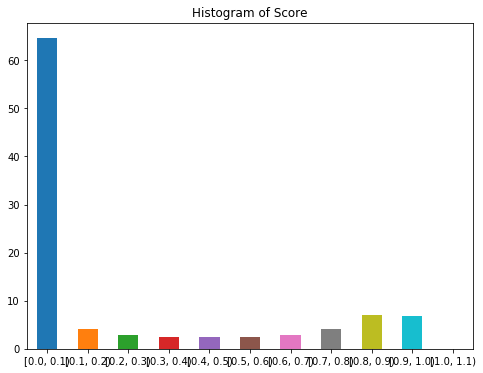

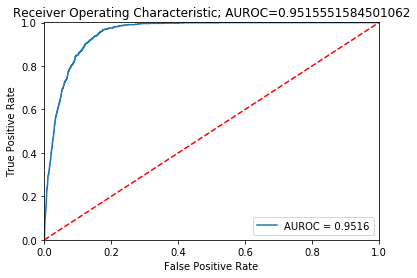

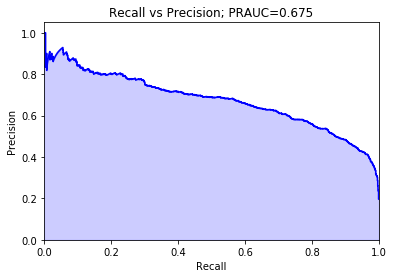

Confusion matrix at threshold 0.5
             precision    recall  f1-score   support

          0       0.99      0.85      0.92      9137
          1       0.45      0.93      0.60      1160

avg / total       0.93      0.86      0.88     10297



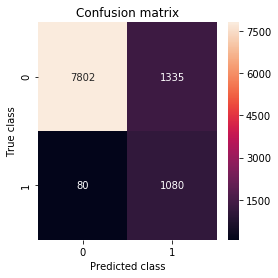

The Model Performance Evaluation:
    AUROC   AUPRC     MCC  Accuracy  Precision  Recall      F1
0  0.9516  0.6754  0.5857    0.8626     0.4472   0.931  0.6042


In [27]:
y_pred_lgb = lgb_class.predict(marketing_new[testing_indices])

lgb_result = evaluate_result(marketing_class[testing_indices],  y_pred_lgb, threshold=0.5)

## DATA ANALYSIS USING TPOT

In [28]:
tpot = TPOTClassifier(verbosity=2, max_time_mins=50, max_eval_time_mins=4, mutation_rate=0.9,
                      early_stop=10, population_size=15, generations=20, scoring = 'average_precision')
tpot.fit(marketing_new[training_indices], marketing_class[training_indices])

Optimization Progress: 52pipeline [00:53,  1.22pipeline/s]                  

Generation 1 - Current best internal CV score: 0.6069201705879612


Optimization Progress: 73pipeline [01:40,  3.32s/pipeline]

Generation 2 - Current best internal CV score: 0.6069201705879612


Optimization Progress: 93pipeline [01:55,  1.17s/pipeline]

Generation 3 - Current best internal CV score: 0.6069201705879612


Optimization Progress: 113pipeline [02:14,  1.01s/pipeline]

Generation 4 - Current best internal CV score: 0.6069201705879612


Optimization Progress: 132pipeline [02:30,  1.21pipeline/s]

Generation 5 - Current best internal CV score: 0.6069201705879612


Optimization Progress: 153pipeline [02:50,  1.20s/pipeline]

Generation 6 - Current best internal CV score: 0.6119924269382757


Optimization Progress: 172pipeline [03:16,  1.35s/pipeline]

Generation 7 - Current best internal CV score: 0.6119924269382757


Optimization Progress: 196pipeline [04:45,  1.32s/pipeline]

Generation 8 - Current best internal CV score: 0.6316084186204802



5.0315434 minutes have elapsed. TPOT will close down.
TPOT closed prematurely. Will use the current best pipeline.

Best pipeline: LinearSVC(DecisionTreeClassifier(input_matrix, criterion=gini, max_depth=7, min_samples_leaf=4, min_samples_split=9), C=5.0, dual=False, loss=squared_hinge, penalty=l2, tol=0.0001)


TPOTClassifier(config_dict={'sklearn.naive_bayes.GaussianNB': {}, 'sklearn.naive_bayes.BernoulliNB': {'alpha': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0], 'fit_prior': [True, False]}, 'sklearn.naive_bayes.MultinomialNB': {'alpha': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0], 'fit_prior': [True, False]}, 'sklearn.tree.DecisionT....3 , 0.35, 0.4 , 0.45, 0.5 , 0.55,
       0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ])}}}},
        crossover_rate=0.1, cv=5, disable_update_check=False,
        early_stop=10, generations=1000000, max_eval_time_mins=0.04,
        max_time_mins=5, memory=None, mutation_rate=0.9, n_jobs=1,
        offspring_size=15, periodic_checkpoint_folder=None,
        population_size=15, random_state=None, scoring=None, subsample=1.0,
        verbosity=2, warm_start=False)

In [29]:
tpot.score(marketing_new[validation_indices], Marketing.loc[validation_indices, 'class'].values)

0.6486178967556245

In [30]:
tpot.export('tpot_marketing_pipeline.py')

True

In [33]:
y_pred = tpot.predict(marketing_new[testing_indices])
# y_score = tpot.predict_proba(marketing_new[testing_indices])

In [ ]:
lgb_result = evaluate_result(marketing_class[testing_indices],  y_pred_lgb, threshold=0.5)

100.0% data are computed
The distribution of scores:
[0.0, 0.1)    90.336991
[0.1, 0.2)     0.000000
[0.2, 0.3)     0.000000
[0.3, 0.4)     0.000000
[0.4, 0.5)     0.000000
[0.5, 0.6)     0.000000
[0.6, 0.7)     0.000000
[0.7, 0.8)     0.000000
[0.8, 0.9)     0.000000
[0.9, 1.0)     0.000000
[1.0, 1.1)     9.663009
dtype: float64


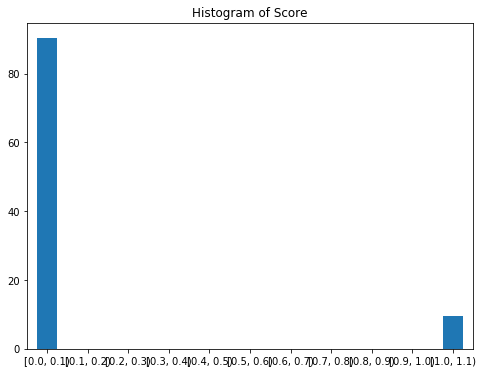

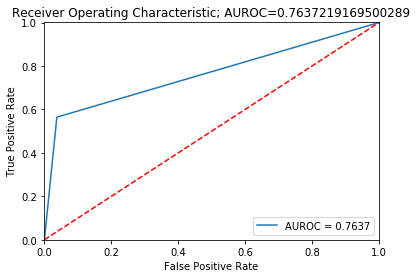

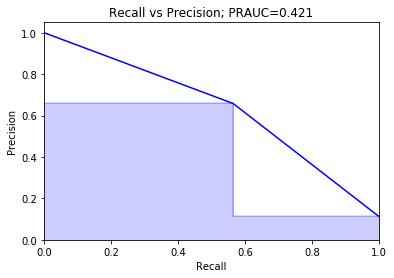

Confusion matrix at threshold 0.5
             precision    recall  f1-score   support

          0       0.95      0.96      0.95      9137
          1       0.66      0.56      0.61      1160

avg / total       0.91      0.92      0.92     10297



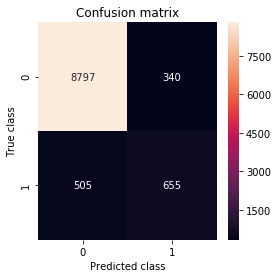

The Model Performance Evaluation:
    AUROC   AUPRC     MCC  Accuracy  Precision  Recall      F1
0  0.7637  0.4208  0.5644    0.9179     0.6583  0.5647  0.6079


In [35]:
tpot_result = evaluate_result(marketing_class[testing_indices],  y_pred, threshold=0.5)

## DATA ANALYSIS USING H2O

In [36]:
import h2o
from h2o.automl import H2OAutoML

In [37]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O cluster uptime:,1 min 52 secs
H2O cluster timezone:,Asia/Seoul
H2O data parsing timezone:,UTC
H2O cluster version:,3.20.0.7
H2O cluster version age:,12 days
H2O cluster name:,H2O_from_python_406480_6i1w2d
H2O cluster total nodes:,1
H2O cluster free memory:,3.545 Gb
H2O cluster total cores:,8
H2O cluster allowed cores:,8
H2O cluster status:,"locked, healthy"


In [72]:
origin_df =  Marketing.drop(['marital','default','housing','loan','contact'
                                ,'poutcome','job','education','month'
                                ,'day_of_week'], axis=1)

In [73]:
X_train , X_test = train_test_split(origin_df, test_size = 0.33)

In [74]:
print(X_train.shape, X_test.shape)

(27595, 11) (13593, 11)


In [75]:
train = h2o.H2OFrame(X_train)
test = h2o.H2OFrame(X_test)

/usr/local/lib/python3.6/site-packages/h2o/utils/shared_utils.py:177: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  data = _handle_python_lists(python_obj.as_matrix().tolist(), -1)[1]


Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


In [85]:
# Identify predictors and response
X = train.columns
y = 'class'
X.remove(y)

In [86]:
train['class'] = train['class'].asfactor()
test['class'] = test['class'].asfactor()

In [87]:
aml = H2OAutoML(max_runtime_secs= 120)
aml.train(x= X, y = y, training_frame = train)

AutoML progress: |████████████████████████████████████████████████████████| 100%


In [88]:
# View the AutoML Leaderboard
lb = aml.leaderboard
lb

model_id,auc,logloss,mean_per_class_error,rmse,mse
GBM_grid_0_AutoML_20180914_010952_model_1,0.946941,0.178473,0.153739,0.238996,0.0571193
StackedEnsemble_AllModels_0_AutoML_20180914_010952,0.94653,0.196292,0.147693,0.243491,0.0592877
GBM_grid_0_AutoML_20180914_010952_model_4,0.946463,0.175834,0.141374,0.237421,0.0563687
StackedEnsemble_BestOfFamily_0_AutoML_20180914_010952,0.945893,0.198635,0.143433,0.244766,0.0599106
GBM_grid_0_AutoML_20180914_010952_model_0,0.945802,0.180062,0.153492,0.239519,0.0573693
GBM_grid_0_AutoML_20180914_010952_model_2,0.945784,0.180316,0.161161,0.240338,0.0577622
GBM_grid_0_AutoML_20180914_010952_model_3,0.944436,0.183893,0.148675,0.242889,0.058995
GBM_grid_0_AutoML_20180914_010952_model_5,0.93633,0.210201,0.171199,0.250757,0.0628792
DRF_0_AutoML_20180914_010952,0.936118,0.191775,0.15509,0.24477,0.0599122
GBM_grid_0_AutoML_20180914_010952_model_6,0.935166,0.232182,0.16959,0.261267,0.0682606


In [89]:
# The leader model is stored here
aml.leader

# If you need to generate predictions on a test set, you can make
# predictions directly on the `"H2OAutoML"` object, or on the leader
# model object directly

preds = aml.predict(test)

# or:
preds = aml.leader.predict(test)

gbm prediction progress: |████████████████████████████████████████████████| 100%
gbm prediction progress: |████████████████████████████████████████████████| 100%


In [115]:
aml.leader

Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  GBM_grid_0_AutoML_20180914_010952_model_1


ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.04153287276452869
RMSE: 0.20379615493067746
LogLoss: 0.13730071773810995
Mean Per-Class Error: 0.08564329949795091
AUC: 0.9712880185953371
Gini: 0.9425760371906742
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4547541371646059: 


,0,1,Error,Rate
0,18990.0,563.0,0.0288,(563.0/19553.0)
1,686.0,1771.0,0.2792,(686.0/2457.0)
Total,19676.0,2334.0,0.0567,(1249.0/22010.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.4547541,0.7393029,168.0
max f2,0.1721563,0.8098916,280.0
max f0point5,0.5739262,0.7792282,122.0
max accuracy,0.5172689,0.9439800,144.0
max precision,0.9670761,1.0,0.0
max recall,0.0047559,1.0,392.0
max specificity,0.9670761,1.0,0.0
max absolute_mcc,0.4547541,0.7077814,168.0
max min_per_class_accuracy,0.2029034,0.9093745,266.0
max mean_per_class_accuracy,0.1650692,0.9143567,283.0


Gains/Lift Table: Avg response rate: 11.16 %, avg score: 11.17 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0100409,0.8797360,8.9580790,8.9580790,1.0,0.9095936,1.0,0.9095936,0.0899471,0.0899471,795.8078958,795.8078958
,2,0.0200363,0.8293406,8.7952048,8.8768265,0.9818182,0.8564382,0.9909297,0.8830761,0.0879121,0.1778592,779.5204795,787.6826541
,3,0.0300318,0.7685739,8.5508936,8.7683466,0.9545455,0.7994310,0.9788200,0.8552366,0.0854701,0.2633293,755.0893551,776.8346575
,4,0.0400273,0.7126227,7.9401154,8.5615238,0.8863636,0.7393778,0.9557321,0.8263048,0.0793651,0.3426943,694.0115440,756.1523817
,5,0.0500227,0.6603048,7.2479002,8.2990377,0.8090909,0.6844113,0.9264305,0.7979519,0.0724461,0.4151404,624.7900248,729.9037727
,6,0.1,0.4749867,5.5295778,6.9149369,0.6172727,0.5609957,0.7719219,0.6795276,0.2763533,0.6914937,452.9577830,591.4936915
,7,0.1500227,0.2980344,3.0755257,5.6347456,0.3433243,0.3851948,0.6290127,0.5813870,0.1538462,0.8453398,207.5525746,463.4745607
,8,0.2,0.1579737,1.8079032,4.6784697,0.2018182,0.2232151,0.5222626,0.4918847,0.0903541,0.9356939,80.7903208,367.8469678
,9,0.3,0.0365934,0.5128205,3.2899200,0.0572467,0.0816861,0.3672573,0.3551518,0.0512821,0.9869760,-48.7179487,228.9919957
,10,0.4,0.0122241,0.1017501,2.4928775,0.0113585,0.0209787,0.2782826,0.2716085,0.0101750,0.9971510,-89.8249898,149.2877493




ModelMetricsBinomial: gbm
** Reported on validation data. **

MSE: 0.05888933181775405
RMSE: 0.24267124225534853
LogLoss: 0.18486413136924637
Mean Per-Class Error: 0.11781383704201931
AUC: 0.9433142503351765
Gini: 0.8866285006703529
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.2693306616845479: 


,0,1,Error,Rate
0,4538.0,421.0,0.0849,(421.0/4959.0)
1,131.0,495.0,0.2093,(131.0/626.0)
Total,4669.0,916.0,0.0988,(552.0/5585.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.2693307,0.6420233,229.0
max f2,0.1021725,0.7478970,301.0
max f0point5,0.5018751,0.6187930,139.0
max accuracy,0.5279785,0.9147717,129.0
max precision,0.9574008,1.0,0.0
max recall,0.0063121,1.0,384.0
max specificity,0.9574008,1.0,0.0
max absolute_mcc,0.2630757,0.6014103,232.0
max min_per_class_accuracy,0.1438068,0.8706070,282.0
max mean_per_class_accuracy,0.0799303,0.8821862,314.0


Gains/Lift Table: Avg response rate: 11.21 %, avg score: 11.15 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0100269,0.8598442,6.5319774,6.5319774,0.7321429,0.8939680,0.7321429,0.8939680,0.0654952,0.0654952,553.1977408,553.1977408
,2,0.0200537,0.7927883,6.8506105,6.6912939,0.7678571,0.8277990,0.75,0.8608835,0.0686901,0.1341853,585.0610452,569.1293930
,3,0.0300806,0.7346142,5.8947113,6.4257664,0.6607143,0.7630453,0.7202381,0.8282707,0.0591054,0.1932907,489.4711319,542.5766393
,4,0.0401074,0.6758102,6.3726609,6.4124900,0.7142857,0.7065538,0.71875,0.7978415,0.0638978,0.2571885,537.2660885,541.2490016
,5,0.0501343,0.6332802,5.2574452,6.1814811,0.5892857,0.6550751,0.6928571,0.7692882,0.0527157,0.3099042,425.7445230,518.1481059
,6,0.1000895,0.4720171,4.9245365,5.5541331,0.5519713,0.5468407,0.6225403,0.6582634,0.2460064,0.5559105,392.4536512,455.4133065
,7,0.1500448,0.3119931,3.8373012,4.9825387,0.4301075,0.3942978,0.5584726,0.5703799,0.1916933,0.7476038,283.7301178,398.2538678
,8,0.2,0.1762113,2.0785381,4.2571885,0.2329749,0.2386447,0.4771710,0.4875203,0.1038339,0.8514377,107.8538138,325.7188498
,9,0.3000895,0.0390810,1.1650911,3.2258744,0.1305903,0.0871836,0.3615752,0.3539951,0.1166134,0.9680511,16.5091131,222.5874400
,10,0.4,0.0122968,0.2877976,2.4920128,0.0322581,0.0220988,0.2793196,0.2710953,0.0287540,0.9968051,-71.2202412,149.2012780




ModelMetricsBinomial: gbm
** Reported on cross-validation data. **

MSE: 0.05711925688669364
RMSE: 0.23899635329162167
LogLoss: 0.17847258763397555
Mean Per-Class Error: 0.10816339198173186
AUC: 0.9469413470845476
Gini: 0.8938826941690952
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.28869560133972993: 


,0,1,Error,Rate
0,18077.0,1476.0,0.0755,(1476.0/19553.0)
1,570.0,1887.0,0.232,(570.0/2457.0)
Total,18647.0,3363.0,0.093,(2046.0/22010.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.2886956,0.6484536,228.0
max f2,0.1121465,0.7622179,304.0
max f0point5,0.4980863,0.6159248,147.0
max accuracy,0.4980863,0.9145388,147.0
max precision,0.9641265,1.0,0.0
max recall,0.0039997,1.0,394.0
max specificity,0.9641265,1.0,0.0
max absolute_mcc,0.2228134,0.6073501,254.0
max min_per_class_accuracy,0.1502432,0.8819107,286.0
max mean_per_class_accuracy,0.0855378,0.8918366,318.0


Gains/Lift Table: Avg response rate: 11.16 %, avg score: 11.13 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0100409,0.8724061,7.0529671,7.0529671,0.7873303,0.9049093,0.7873303,0.9049093,0.0708181,0.0708181,605.2967143,605.2967143
,2,0.0200363,0.8161763,7.0035890,7.0283341,0.7818182,0.8421883,0.7845805,0.8736199,0.0700041,0.1408221,600.3589004,602.8334058
,3,0.0300318,0.7582179,6.5556851,6.8710227,0.7318182,0.7861980,0.7670197,0.8445234,0.0655271,0.2063492,555.5685056,587.1022741
,4,0.0400273,0.7038882,5.8227513,6.6092524,0.65,0.7312582,0.7377980,0.8162392,0.0582011,0.2645503,482.2751323,560.9252353
,5,0.0500227,0.6558190,5.5377215,6.3951408,0.6181818,0.6800138,0.7138965,0.7890189,0.0553521,0.3199023,453.7721538,539.5140837
,6,0.1,0.4679233,4.8455063,5.6206756,0.5409091,0.5588111,0.6274421,0.6739673,0.2421652,0.5620676,384.5506346,462.0675621
,7,0.1500227,0.2973242,3.9379748,5.0596055,0.4396004,0.3832351,0.5648092,0.5770272,0.1969882,0.7590558,293.7974764,405.9605468
,8,0.2,0.1566044,2.3535317,4.3833944,0.2627273,0.2213958,0.4893230,0.4881598,0.1176231,0.8766789,135.3531654,338.3394383
,9,0.3,0.0385784,0.9808710,3.2492199,0.1094957,0.0841636,0.3627139,0.3534944,0.0980871,0.9747660,-1.9129019,224.9219916
,10,0.4,0.0123356,0.1953602,2.4857550,0.0218083,0.0217376,0.2774875,0.2705552,0.0195360,0.9943020,-80.4639805,148.5754986



Cross-Validation Metrics Summary: 


,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
accuracy,0.9074511,0.0039616,0.9079964,0.9145843,0.9084507,0.8973194,0.908905
auc,0.9470167,0.0013406,0.9487353,0.9443765,0.9452662,0.9475119,0.9491938
err,0.0925488,0.0039616,0.0920036,0.0854157,0.0915493,0.1026806,0.0910950
err_count,407.4,17.439037,405.0,376.0,403.0,452.0,401.0
f0point5,0.5958131,0.0209277,0.6137184,0.6139154,0.6132686,0.5374782,0.6006847
f1,0.6514143,0.0114021,0.6683047,0.6569343,0.6528854,0.6208054,0.6581415
f2,0.7200845,0.0106261,0.7335491,0.7064364,0.6979742,0.7347101,0.7277526
lift_top_group,7.0331755,0.3626479,6.772308,7.073921,6.231918,7.746104,7.341627
logloss,0.1784726,0.0046557,0.1815459,0.1803451,0.1872931,0.1676367,0.1755422
max_per_class_error,0.2239714,0.0261900,0.2153846,0.2561984,0.2683398,0.1628959,0.2170385


Scoring History: 


,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_auc,validation_lift,validation_classification_error
,2018-09-14 01:10:36,5.293 sec,0.0,0.3149120,0.3499120,0.5,1.0,0.8883689,0.3154725,0.3508554,0.5,1.0,0.8879141
,2018-09-14 01:10:36,5.340 sec,5.0,0.2607459,0.2361357,0.9536227,8.3658093,0.0794639,0.2691412,0.2486147,0.9384399,6.8506105,0.0927484
,2018-09-14 01:10:36,5.398 sec,10.0,0.2379741,0.1976298,0.9573388,8.6338046,0.0765561,0.2525285,0.2160748,0.9403532,6.4173813,0.0966876
,2018-09-14 01:10:36,5.458 sec,15.0,0.2278332,0.1790372,0.9588279,8.7959418,0.0774648,0.2463882,0.2017238,0.9412141,6.8506105,0.0966876
,2018-09-14 01:10:36,5.516 sec,20.0,0.2218441,0.1670544,0.9617085,8.7973959,0.0763289,0.2438113,0.1940604,0.9422414,7.1692435,0.0950761
,2018-09-14 01:10:36,5.576 sec,25.0,0.2182739,0.1600175,0.9631425,8.8770104,0.0726034,0.2430008,0.1903418,0.9424297,7.0099270,0.1024172
,2018-09-14 01:10:36,5.634 sec,30.0,0.2151892,0.1540023,0.9649416,8.9175447,0.0682417,0.2424687,0.1876467,0.9425909,7.1692435,0.0965085
,2018-09-14 01:10:36,5.693 sec,35.0,0.2126860,0.1499959,0.9662995,8.9580790,0.0671513,0.2424464,0.1864968,0.9428923,7.3285600,0.0961504
,2018-09-14 01:10:36,5.752 sec,40.0,0.2108363,0.1466049,0.9674365,8.9580790,0.0666970,0.2423247,0.1852978,0.9430404,7.0099270,0.0981200
,2018-09-14 01:10:36,5.811 sec,45.0,0.2092082,0.1441105,0.9683072,8.9580790,0.0640618,0.2426183,0.1851469,0.9430150,7.1692435,0.0982990


Variable Importances: 


variable,relative_importance,scaled_importance,percentage
duration,2452.375,1.0,0.4286723
nr.employed,1182.6361084,0.4822411,0.2067234
euribor3m,829.0327759,0.3380530,0.1449140
age,324.7643738,0.1324285,0.0567684
pdays,225.9858856,0.0921498,0.0395021
cons.conf.idx,213.4607849,0.0870425,0.0373127
cons.price.idx,177.4157715,0.0723445,0.0310121
campaign,152.2394257,0.0620784,0.0266113
emp.var.rate,92.4748154,0.0377083,0.0161645
previous,70.4770050,0.0287383,0.0123193
